In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [23]:
import numpy as np

from scipy.stats import linregress

def plot_histogram(text, bins=20, w=4, h=2):
    
    author = '{} {}'.format(text.get('authorFirst'), text.get('authorLast'))
    print('{} ({}, {})'.format(text['title'], author, text['year']))

    plt.figure(figsize=(w,h))
    
    plt.xlabel('Narrative time')
    plt.ylabel('"had" count')
    plt.hist(text['offsets'], bins, (0,1))
    plt.show()

In [3]:
from lint_analysis.token_offsets import Dataset

ds = Dataset.from_local('had.json')

In [4]:
from numpy.random import multinomial

def sample_series(series, n=1000, *args, **kwargs):
    return multinomial(series.sum(), series/series.sum(), n)

In [5]:
from scipy import stats

def first_bin_zscore(text, bins=20):

    y, _, _, _ = stats.histogram(text['offsets'], bins, (0, 1))

    expected = y.sum() / len(y)
    samples = sample_series(np.full(len(y), expected))

    avg_std = samples.std(1).mean()

    return (y[0]-expected)/avg_std

In [6]:
data = []
for text in ds.texts():
    zscore = first_bin_zscore(text)
    data.append((zscore, text['year'], text))

In [8]:
import pandas as pd

df = pd.DataFrame(data, columns=('zscore', 'year', 'text'))

In [9]:
df.sort_values('zscore', ascending=False)

,zscore,year,text
14340,23.193691,1991,"{'corpus': 'chicago', 'identifier': '23727', '..."
10286,15.945939,1895,"{'corpus': 'gale', 'identifier': 'AMFCF0002-C0..."
18609,15.836369,1966,"{'corpus': 'chicago', 'identifier': '20679', '..."
1,15.218027,1941,"{'corpus': 'chicago', 'identifier': '10639', '..."
2292,14.188443,1994,"{'corpus': 'chicago', 'identifier': '25492', '..."
10656,14.108575,1899,"{'corpus': 'gale', 'identifier': 'AMFCF0002-C0..."
6436,13.855034,1917,"{'corpus': 'gale', 'identifier': 'AMFCF0003-C0..."
11105,13.578018,1954,"{'corpus': 'chicago', 'identifier': '20139', '..."
16541,13.265883,1945,"{'corpus': 'chicago', 'identifier': '11765', '..."
10062,13.072471,1989,"{'corpus': 'chicago', 'identifier': '23211', '..."


In [11]:
import statsmodels.api as sm

X = df['year']
y = df['zscore']

X = sm.add_constant(X)
fit = sm.OLS(y, X).fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 zscore   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     794.4
Date:                Mon, 01 May 2017   Prob (F-statistic):          2.74e-172
Time:                        16:52:51   Log-Likelihood:                -59942.
No. Observations:               26971   AIC:                         1.199e+05
Df Residuals:                   26969   BIC:                         1.199e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.8501      0.569    -27.855      0.000     -16.965     -14.735
year           0.0084      0.000     28.186      0.000       0.008       0.009
==============================================================================
Omnibus:                     3500.019   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7763.328
Skew:                           0.782   Prob(JB):                         0.00
Kurtosis:                       5.112   Cond. No.                     8.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

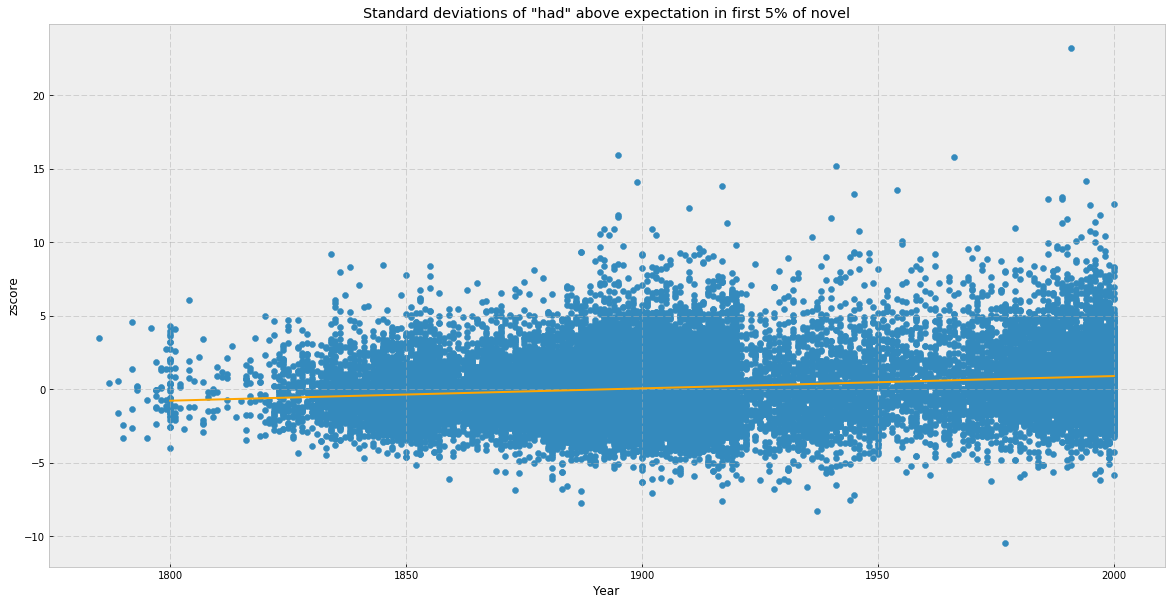

In [15]:
plt.figure(figsize=(20, 10))
plt.scatter(df['year'], df['zscore'])

x1 = 1800
x2 = 2000
y1 = fit.params[1]*x1 + fit.params[0]
y2 = fit.params[1]*x2 + fit.params[0]

plt.title('Standard deviations of "had" above expectation in first 5% of novel')
plt.xlabel('Year')
plt.ylabel('zscore')
plt.plot([x1, x2], [y1, y2], c='orange')

plt.show()

Beyond deserving (Sandra Jean Scofield, 1991)


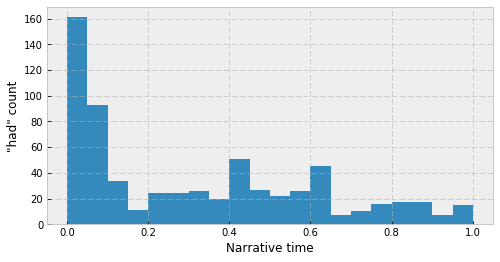

The Banker and the Typewriter: Nevada McNeill (Nevada McNeill, 1895)


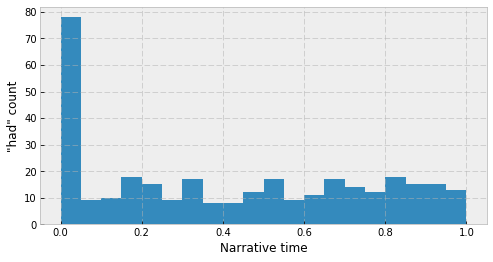

Tai-Pan (James Clavell, 1966)


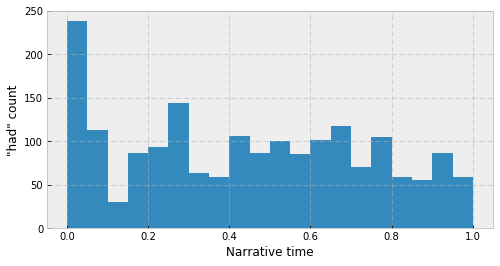

In this our life (Ellen Anderson Gholson Glasgow, 1941)


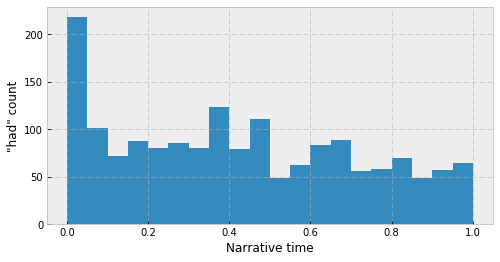

Grand passion (Jayne Castle, 1994)


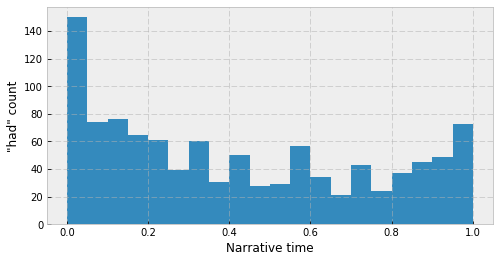

Love and Politics: A Social Romance of a Prominent Orator and a Society Queen: Reproductions of Their Letters and Poems: By Neile Bevans (Nelie Bevans, 1899)


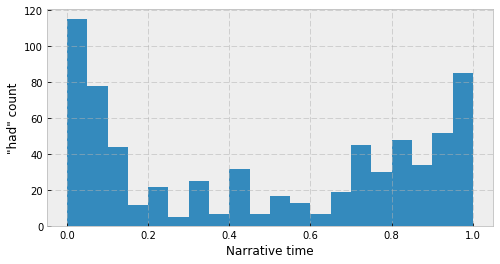

His Family: By Ernest Poole (Ernest Poole, 1917)


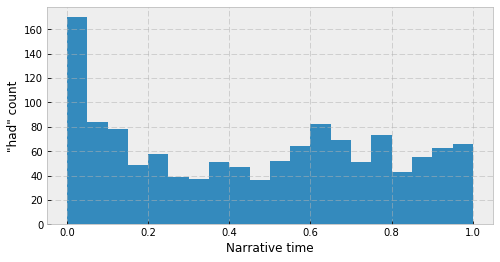

The star beast (Robert A. Heinlein, 1954)


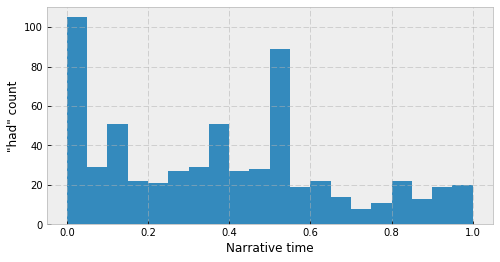

Sparkling cyanide (Agatha Christie, 1945)


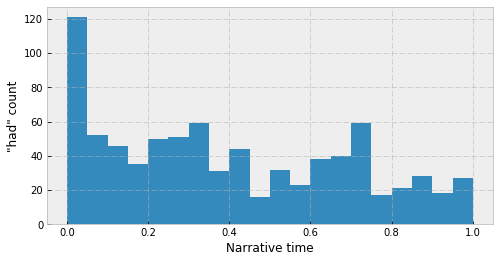

Kiss of the night wind (Janelle Taylor, 1989)


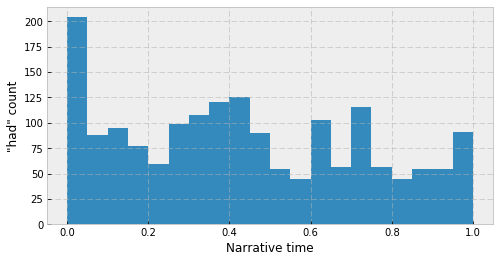

The seventh secret (Irving Wallace, 1986)


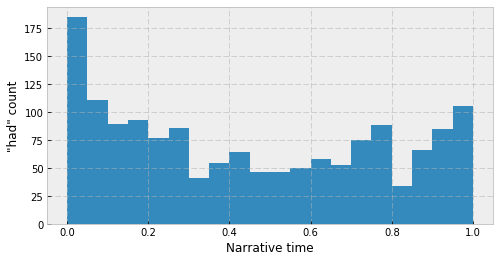

The education of Harriet Hatfield (May Sarton, 1989)


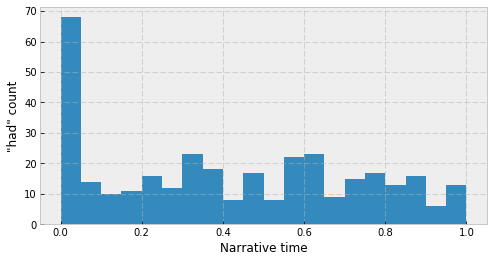

After the parade (Dorothy Garlock, 2000)


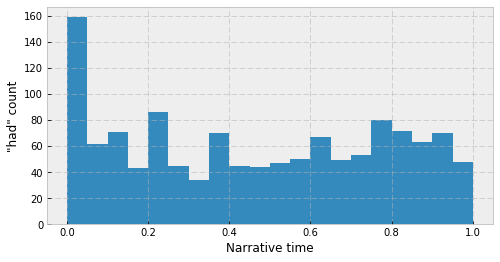

Lasher (Anne Rice, 1995)


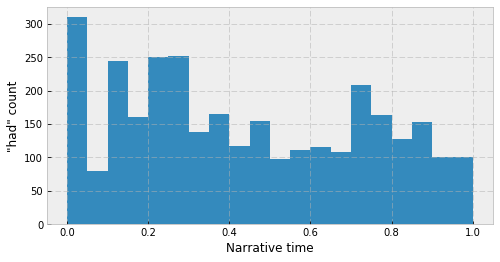

Lost Face (Jack London, 1910)


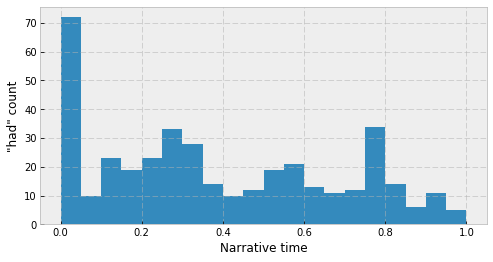

The shadow matrix (Marion Zimmer Bradley, 1997)


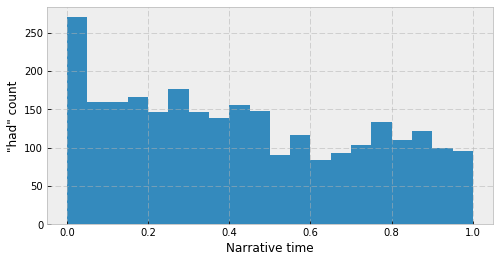

The Red Badge of Courage: An Episode of the American Civil War: By Stephen Crane (Stephen Crane, 1895)


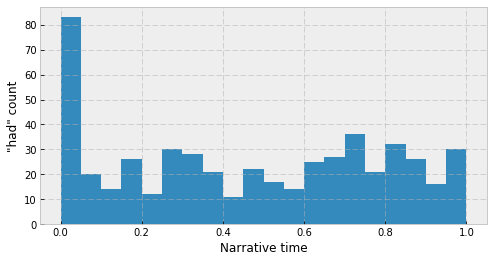

The red badge of courage (Stephen Crane, 1895)


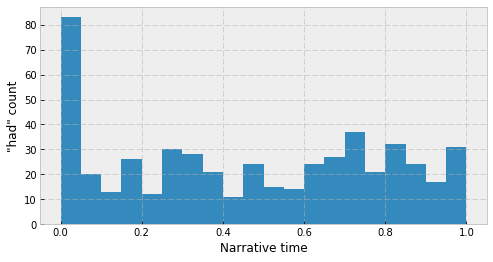

And then there were none (Agatha Christie, 1940)


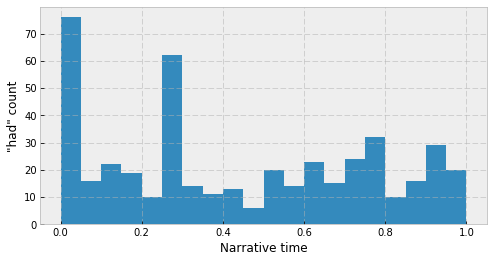

Always and forever (Cynthia Freeman, 1990)


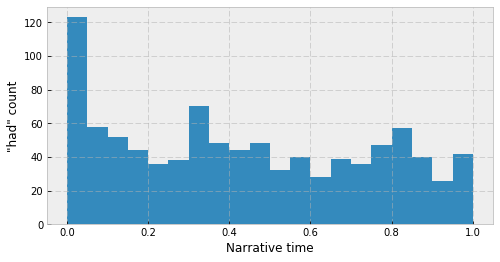

House of smoke (J. F Freedman, 1996)


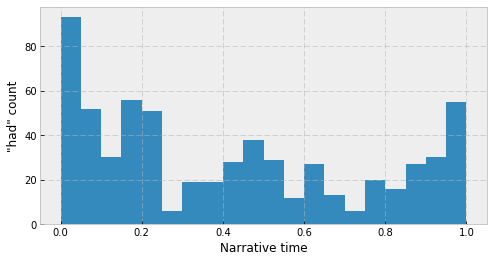

The Red One: By Jack London (Jack London, 1918)


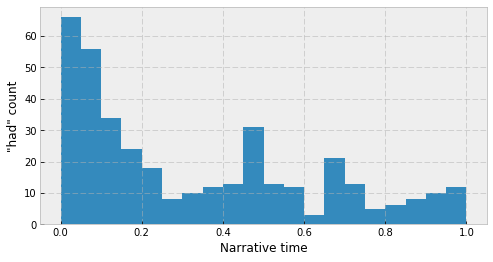

So worthy my love (Kathleen E Woodiwiss, 1989)


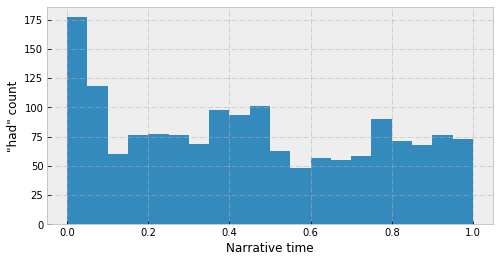

The dancers of Arun (Elizabeth A Lynn, 1979)


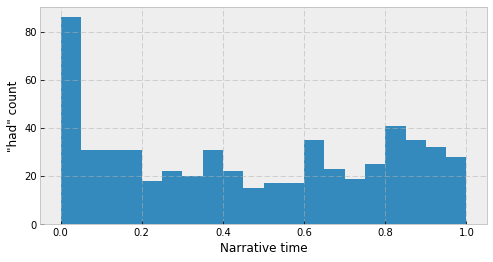

The Free Soil Prophet of the Verdigris: By R. E. Heller … (Robley Heller, 1894)


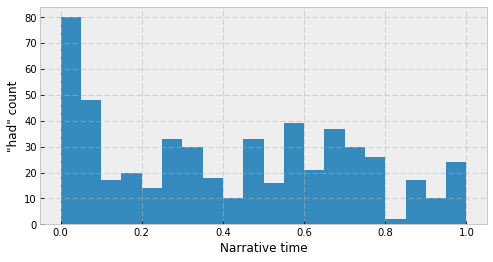

The Surprises of an Empty Hotel: A Novel: By Archibald Clavering Gunter (Archibald Gunter, 1902)


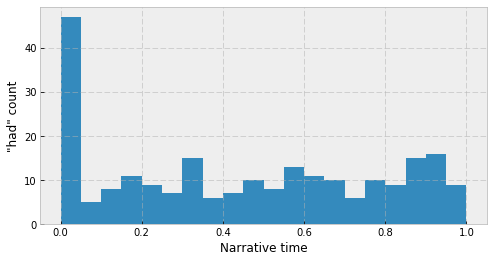

The Heirs of Bradley House: By Amanda M. Douglas … (Amanda Douglas, 1892)


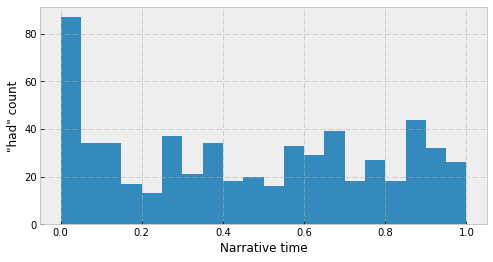

Return to Jalna (Mazo De la Roche, 1946)


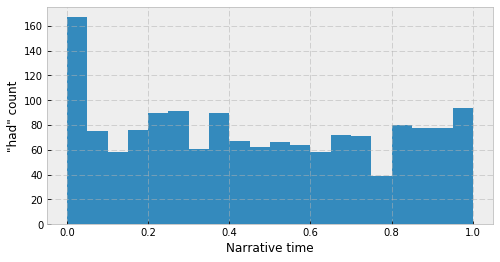

Topping from below (Laura Reese, 1995)


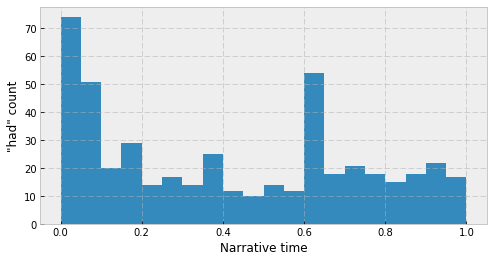

The Stainless Steel Rat goes to hell (Harry Harrison, 1996)


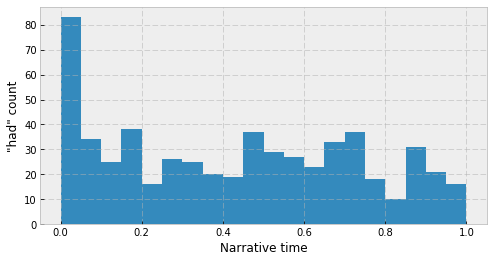

The Man from Mars: His Morals, Politics and Religion: By Thomas Blot (Thomas Blot, 1891)


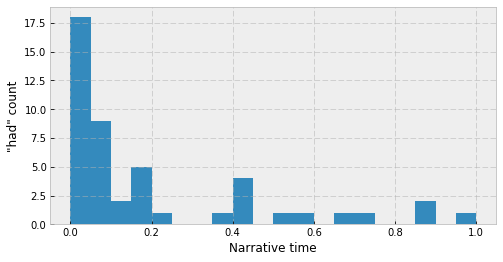

Earth Revisited: By Byron A. Brooks (Byron Brooks, 1893)


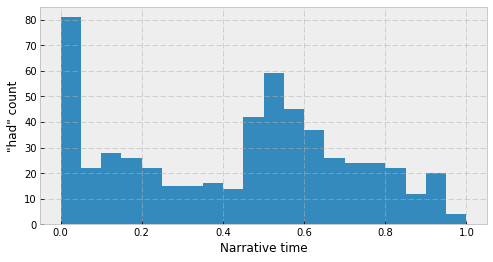

The untilled field (George Moore, 1903)


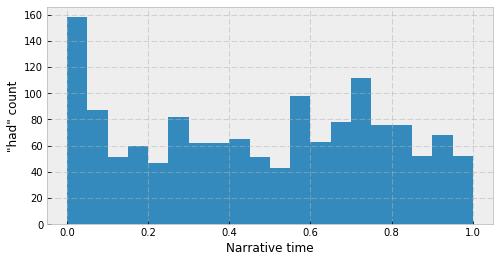

Dinosaur summer (Greg Bear, 1998)


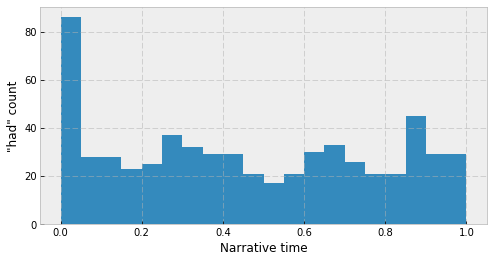

The robin & the kestrel (Mercedes Lackey, 1993)


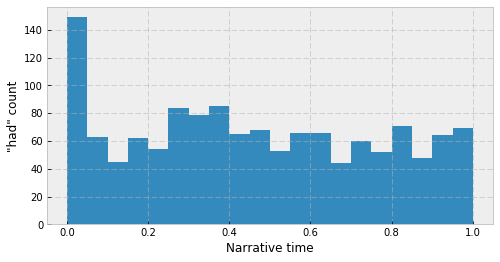

Nightwood (Djuna Barnes, 1936)


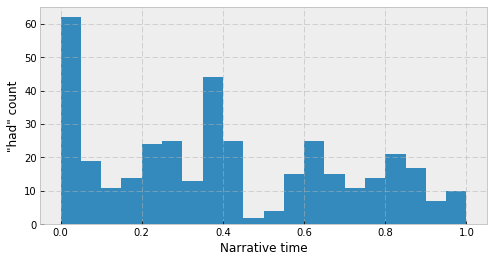

Ten North Frederick (John O'Hara, 1955)


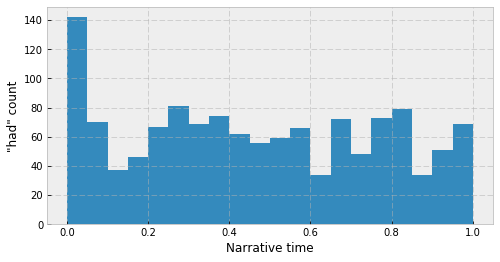

Wildest dreams (Jennifer Blake, 1992)


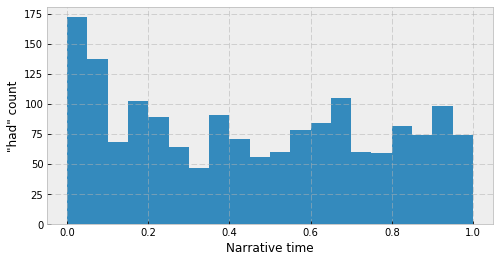

The enchantment of Lily Dahl (Siri Hustvedt, 1996)


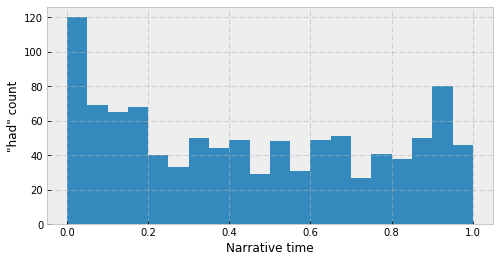

The unwilling heiress (Deborah Fruchey, 1986)


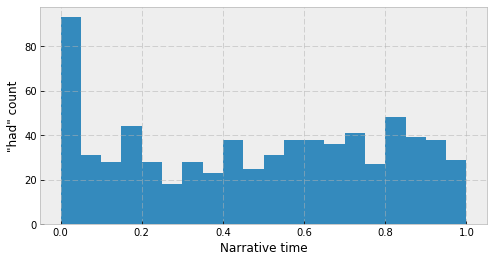

The recognitions (William Gaddis, 1955)


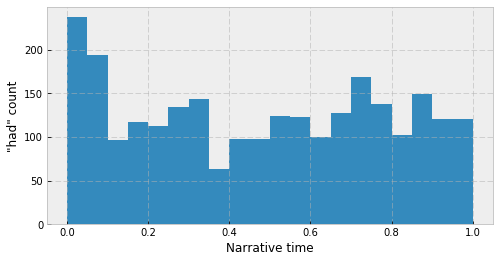

A Change of Opinion: By John Rupert Farrell (John Farrell, 1920)


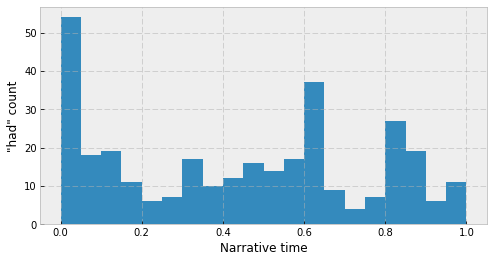

Her Senator: A Novel: By Archibald Clavering Gunter … (Archibald Gunter, 1896)


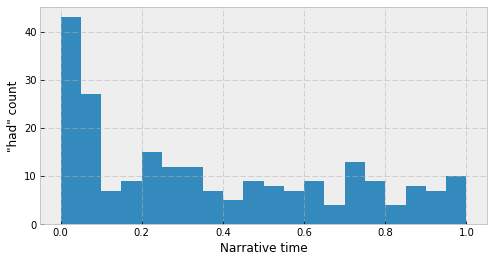

The missing Madonna (Carol Anne O'Marie, 1988)


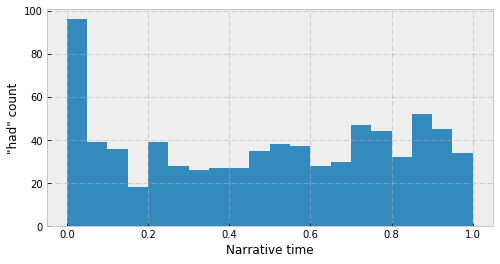

Juggernaut: A Veiled Record: By George Cary Eggleston and Dolores Marbourg (George Eggleston, 1891)


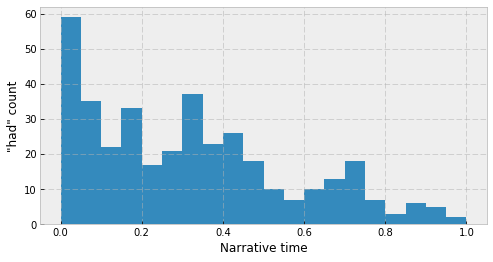

The witching hour (Anne Rice, 1990)


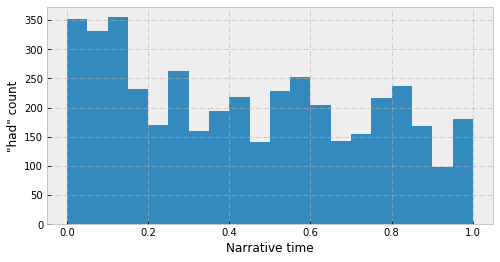

The black chamber (David Chacko, 1988)


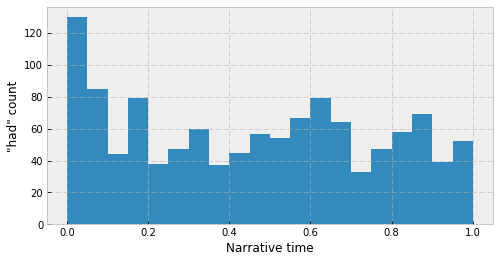

Power of a woman (Barbara Taylor Bradford, 1997)


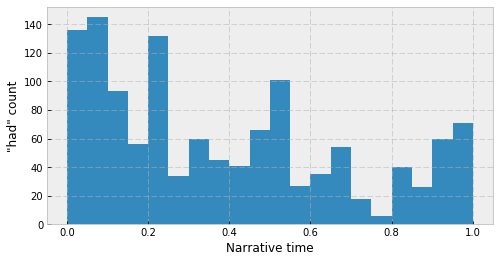

Death of the fox (George Garrett, 1971)


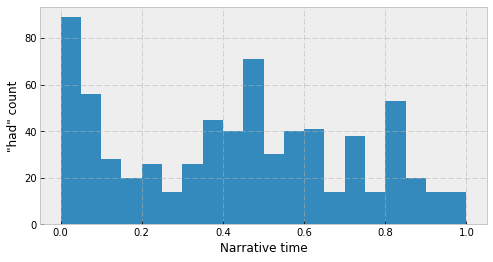

The Valiants of Virginia: By Hallie Erminie Rives (Mrs. Post Wheeler); Illustrated by André Castaigne (Hallie Rives, 1912)


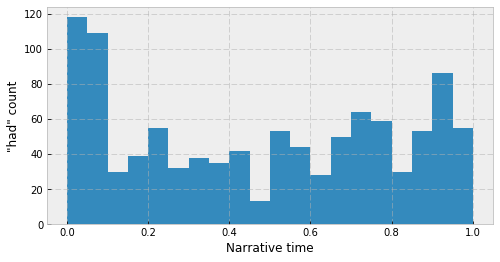

New moon rising (Eugenia Price, 1969)


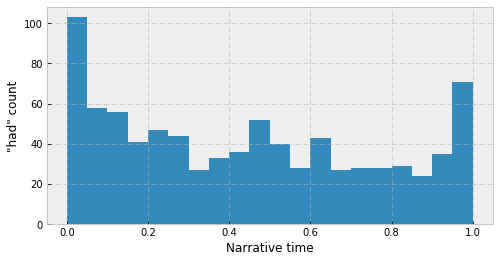

The old silent (Martha Grimes, 1989)


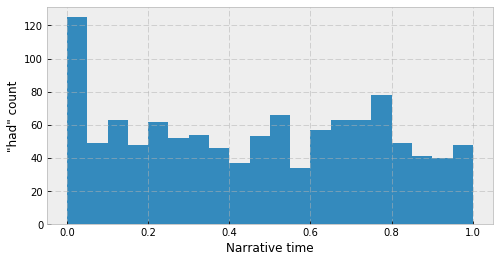

Secret star (Nora Roberts, 1998)


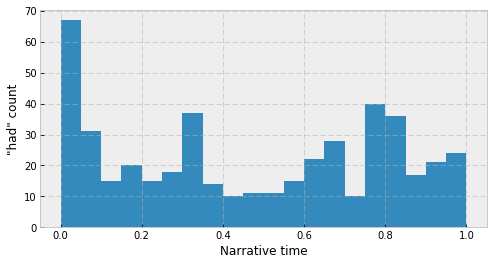

Damaged Goods: The Great Play "Les Avarie´S" of Brieux: Novelized with the Approval of the Author by Upton Sinclair (Upton Sinclair, 1913)


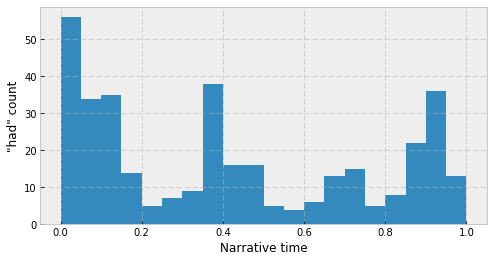

Knife in my back (Sam Merwin, 1945)


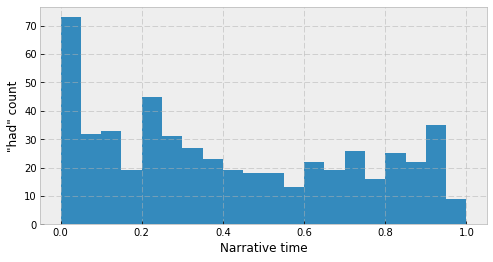

At Anchor: A Novel: Julia Magruder (Julia Magruder, 1887)


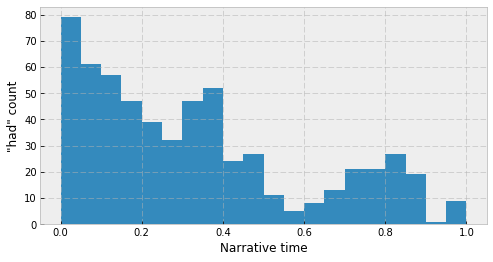

Calamity Jane: A Story of the Black Hills: By Mrs. George E. Spencer … (George Spencer, 1887)


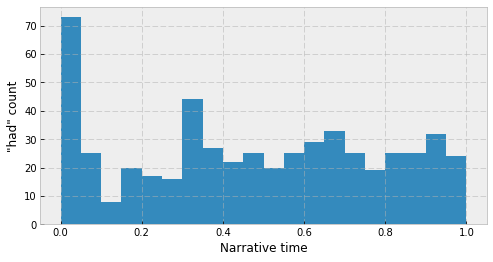

Folcarinia: A Political Love Story: By Adam Dixon Warner… (Adam Warner, 1908)


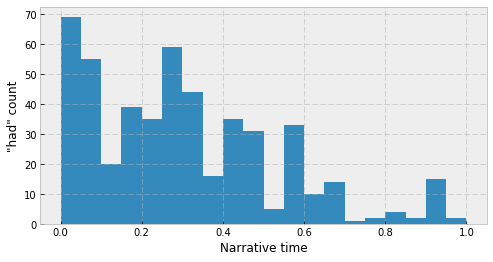

I: said the fly (Morna Doris MacTaggart, 1945)


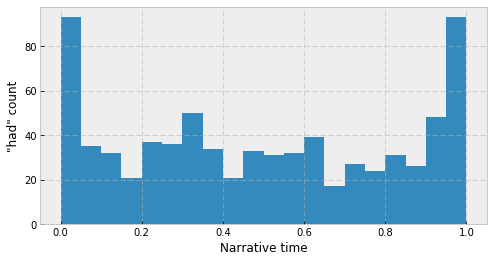

Final blackout (L. Ron Hubbard, 1948)


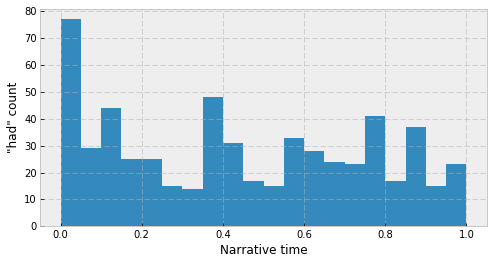

The prize (Irving Wallace, 1962)


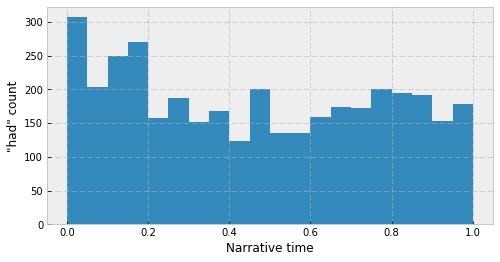

The Valiants of Virginia (Hallie Erminie Rives, 1912)


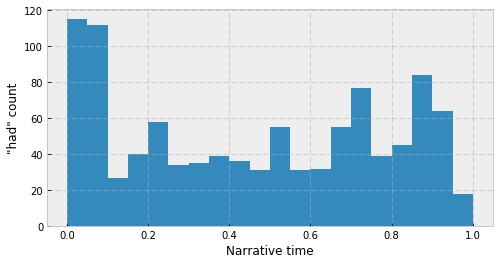

The Atlantic Club-Book: Being Sketches in Prose and Verse: By Various Authors (None None, 1834)


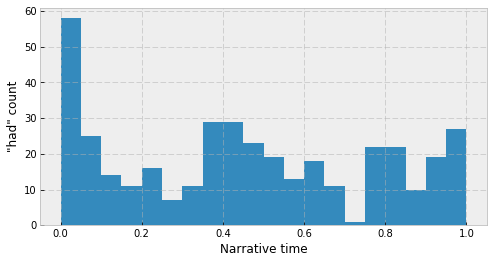

San Isidro: By Mrs. Schuyler Crowninshield (Schuyler Crowninshield, 1900)


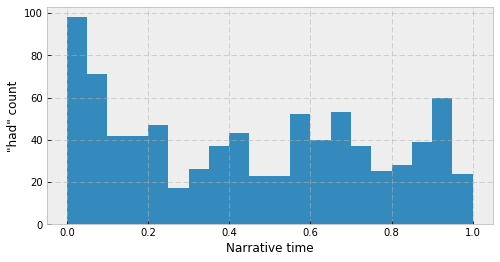

Children of light (Robert Stone, 1986)


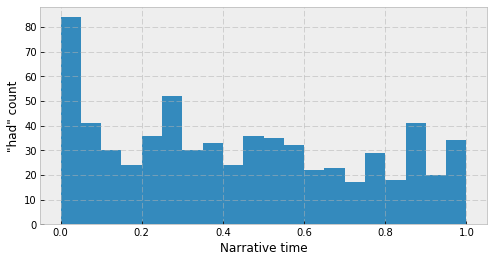

Dark hero (Peter Cheyney, 1946)


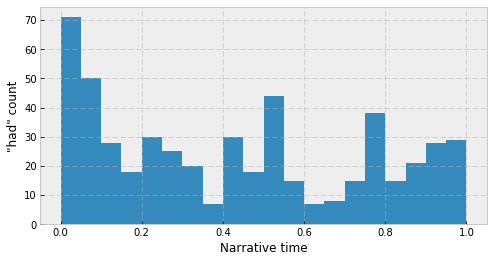

Spanish serenade (Jennifer Blake, 1990)


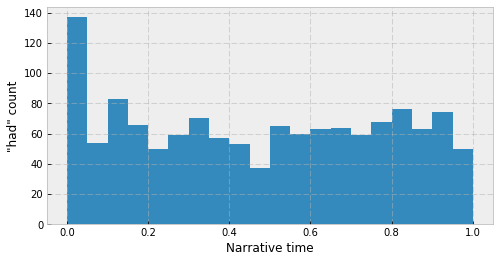

The Soul of the World: By Estella Bachman (Estella Bachman, 1909)


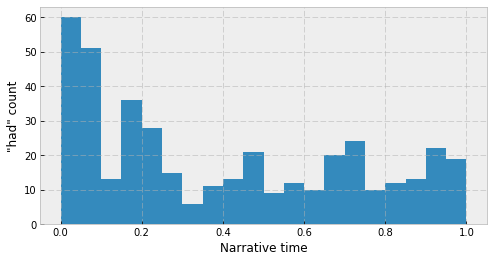

Joyce of the Jasmines: By Ralph Henry Barbour … with Illustrations in Color by Clarence F. Underwood and Decorations by Edward Stratton Holloway (Ralph Barbour, 1911)


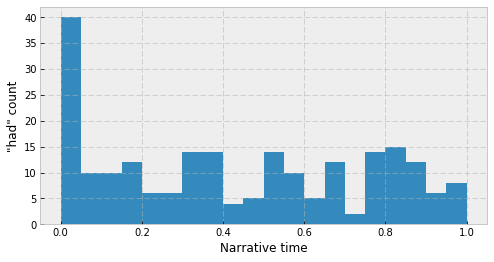

The Sledge: By R. V. Risley (Richard Risley, 1900)


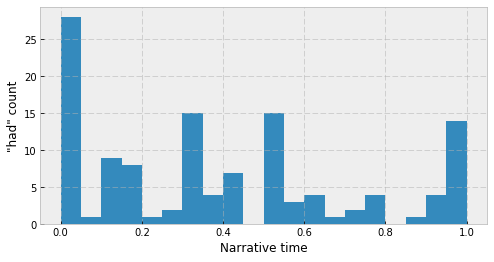

The House of Gladness: By Emma S. Allen (Emma Allen, 1915)


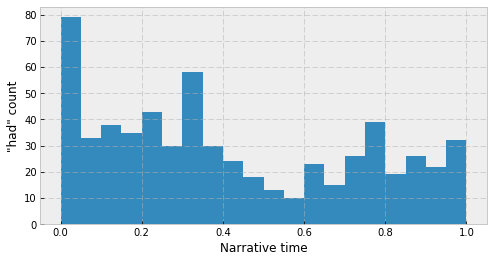

Ashes on the wind (John Fischer, 1998)


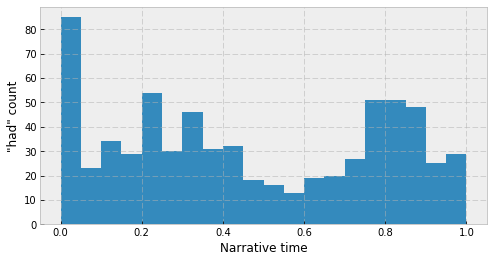

Long Draws: A Short Story of the Day: By W. M. Preston (William Preston, 1904)


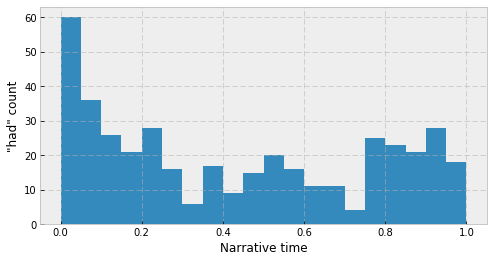

Escape the night (Mignon Good Eberhart, 1944)


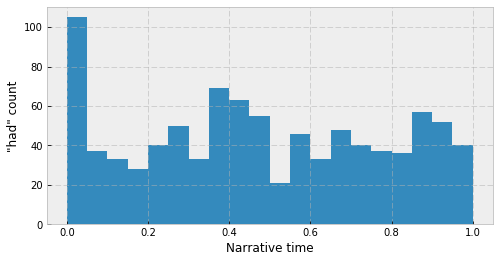

This time a better earth (Ted Allan, 1939)


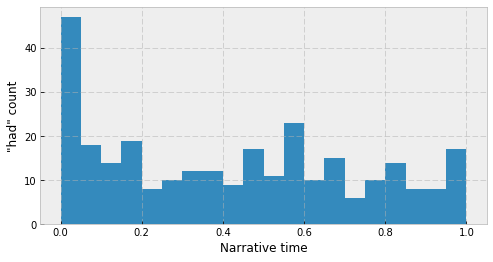

The Encounter: By Anne Douglas Sedgwick (Mrs. Basil De Sélincourt) (Anne Sedgwick, 1914)


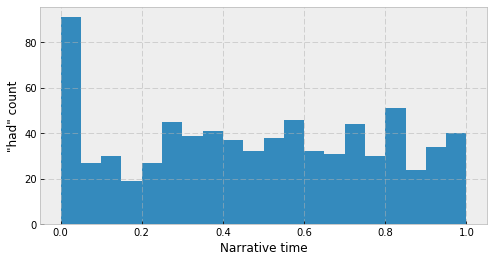

The lodger (Marie Belloc Lowndes, 1931)


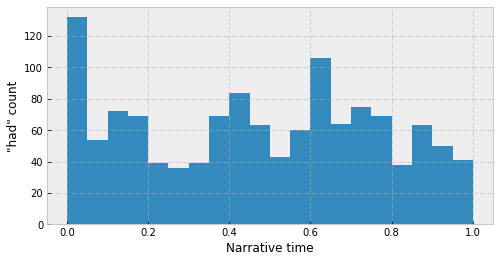

According to St. John: By Amélie Rives … (Amélie Rives, 1891)


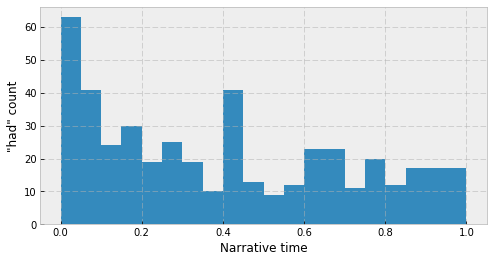

Ripley under ground (Patricia Highsmith, 1970)


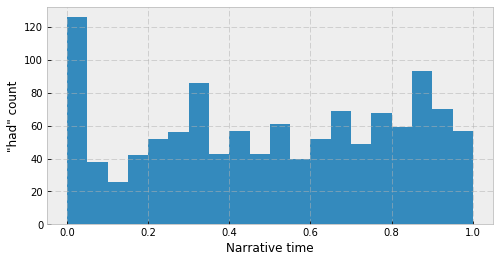

The love talker (Barbara Mertz, 1980)


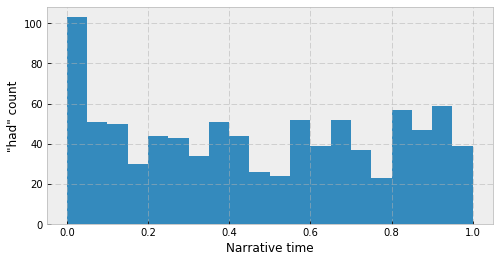

Small changes (Marge Piercy, 1973)


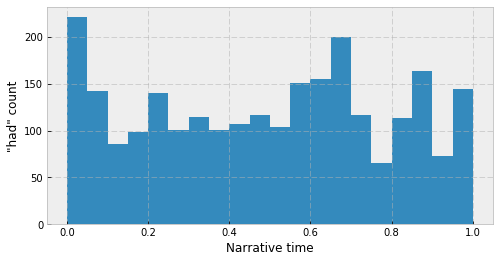

Dear and glorious physician (Taylor Caldwell, 1959)


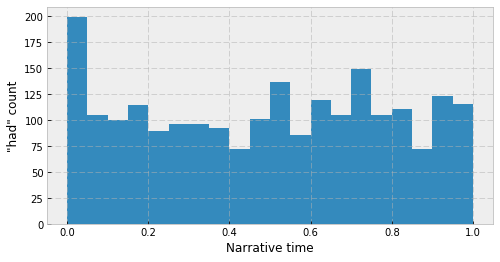

Consider the Lilies: By Clara Froelich Grindell...; Illustrations by Ida W. Prentice (Clara Grindell, 1906)


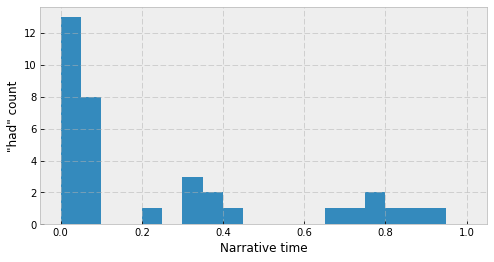

The Golden Heart: By Ralph Henry Barbour... With Illustrations in Color by Clarence F. Underwood and Decorations by Edward Stratton Holloway (Ralph Barbour, 1910)


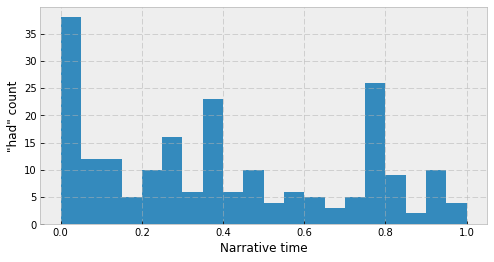

Mexico (James A. Michener, 1992)


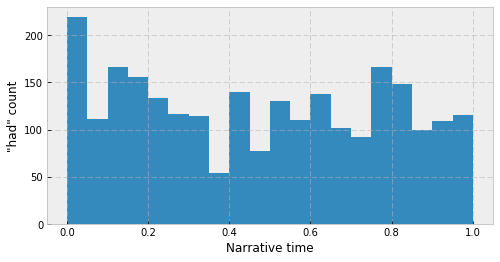

The deep end of the ocean (Jacquelyn Mitchard, 1996)


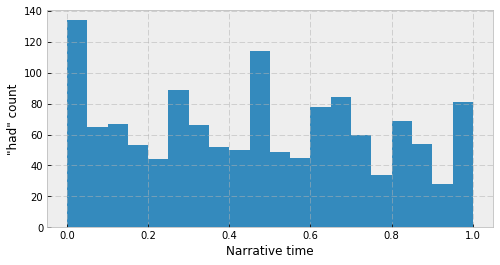

Walden Two (B. F. Skinner, 1948)


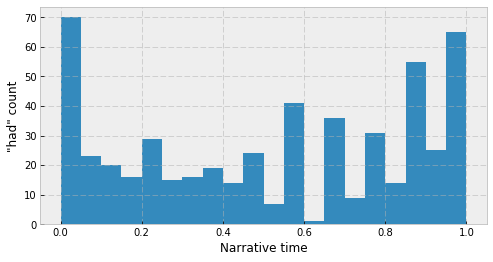

Born of Flame: A Rosicrucian Story: By Mrs. Margaret B. Peeke … (Margaret Peeke, 1892)


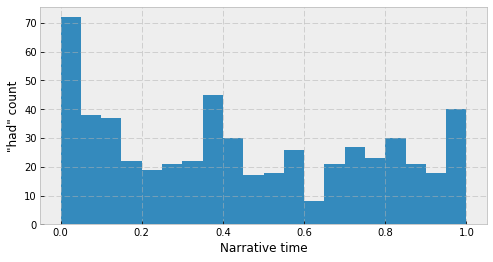

A.D. 2050: Electrical Development at Atlantis: By a Former Resident of "The Hub." (John Bachelder, 1890)


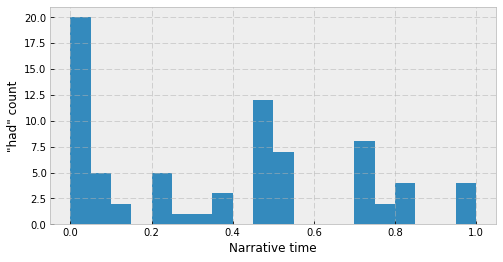

Hollywood kids (Jackie Collins, 1994)


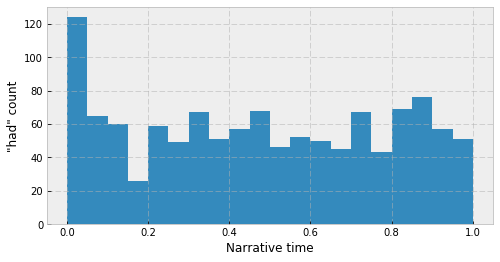

Woman on the edge of time (Marge Piercy, 1976)


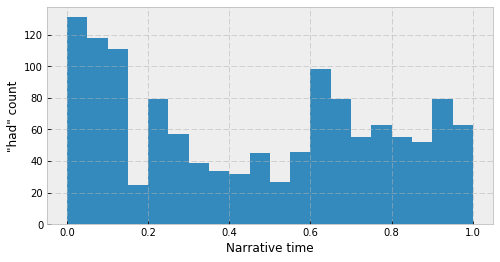

Charred Wood: By Myles Muredach; Illustrated by J. Clinton Shepherd (Francis Kelley, 1917)


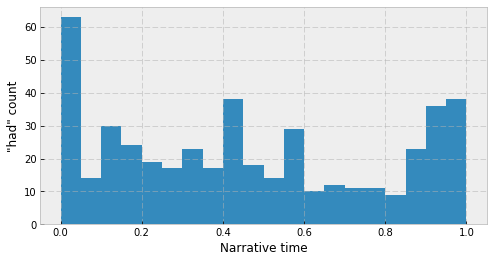

Anvil of stars (Greg Bear, 1992)


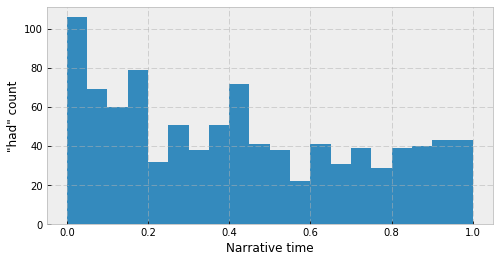

A Forest Idyl: By Temple Oliver (Jeanie Smith, 1913)


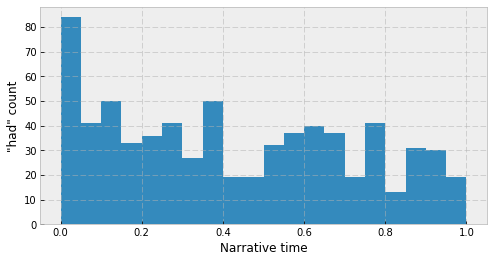

The Shadow: By Arthur Stringer (Arthur Stringer, 1913)


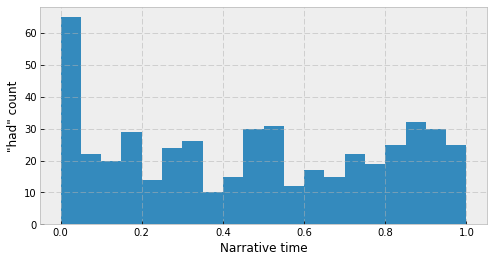

The Hellfire Club (Peter Straub, 1996)


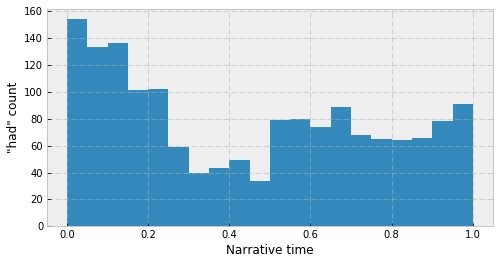

The Treasure of Peyre Gaillard: Being an Account of the Recovery, on a South Carolina Plantation, of a Treasure, Which Had Remained Buried and Lost in a Vast Swamp for over a Hundred Years: Arranged by John Bennett, after the Ms. Narrative by Buck Guignard, esq., in the French manuscript entitled "Le monticule du Jude." (John Bennett, 1906)


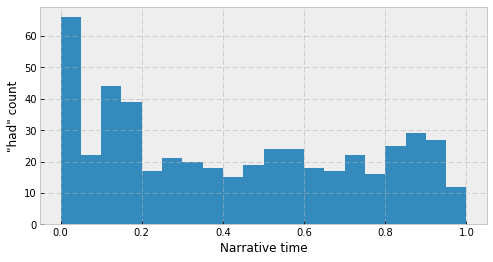

Never-fail Blake (Arthur Stringer, 1924)


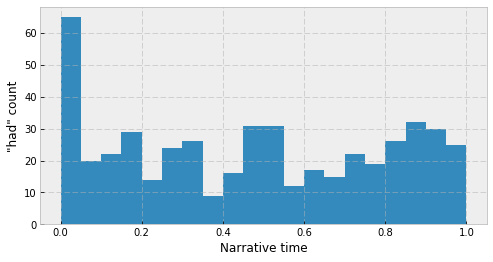

The Ralstons: By F. Marion Crawford … (Francis Crawford, 1895)


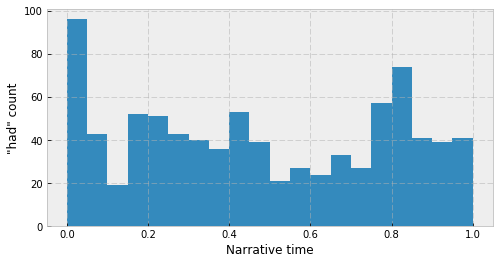

Cryptonomicon (Neal Stephenson, 1999)


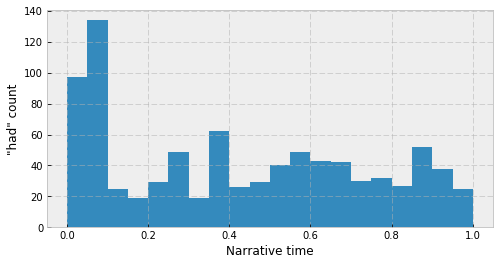

In [25]:
for text in df.sort_values('zscore', ascending=False)['text'].head(100):
    plot_histogram(text, w=8, h=4)